Network X Code goes here, now we convert it into a graph

In [1]:
#Building a Network with Network

#1. Convert XML Network Dictionary into a networkx graph
#2. Create a 3 server, linked network and run shortest path
#3. Implement Random Placement Algorithm

import networkx as nx
import matplotlib.pyplot as plt
from Import_NetworkFromXML import *


def convert_nodes (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))

def convert_links (G, nodes, links):
    for link in links.keys():
        source = links[link].get("source")
        for source_node in nodes:
            if nodes[source_node].get('id') == source:
                break
        dest = links[link].get("destination")
        for dest_node in nodes:
            if nodes[dest_node].get('id') == dest:
                break
        capacity = links[link].get("capacity")
        cost = links[link].get("cost")
        G.add_edges_from([(source, dest, {'capacity': capacity, 'cost': cost})])

def convert_demands(G, nodes, demands):    
    a = 1

import random

def create_users (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        randx = random.randint(x_cor,x_cor+x_cor*2)
        randy = random.randint(y_cor,y_cor+y_cor*2)
        print(randx)
        print(randy)
        #G.add_node(node_id, pos=(x_cor, y_cor))


#def read_network(network_name):
        # G = nx.Graph()
        # path = 'Networks/'
        # #options = ['abilene.xml' , 'janos-us.xml', 'brain.xml']
        # #network_name = options[2]
        # from_xml = read_XMLnetwork (path+network_name)

        # nodes = from_xml[0]
        # links = from_xml[1]
        # demands = from_xml[2]

        # #Test the imported networks
        # #print_test(network_name,nodes,links,demands)

        # convert_nodes(G,nodes)
        # convert_links(G,nodes,links)
        # convert_demands(G,nodes,demands
    #return G, nodes

network_name = "abilene.xml"
G = nx.Graph()
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

        #Test the imported networks
        #print_test(network_name,nodes,links,demands)

convert_nodes(G,nodes)
convert_links(G,nodes,links)
#convert_demands(G,nodes,demands


#(G, nodes) = read_network("abilene.xml")

#create_users(G,nodes)


#print(nx.dijkstra_path(G,'UP10', 'ADH10'))


# final all shortest path pairs
sp = dict(nx.all_pairs_shortest_path(G))
#print(sp)


#print network info
print(nx.info(G))

#%timeit nx.closeness_centrality(G)



nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, style = "solid")


AttributeError: module 'networkx' has no attribute 'info'

# Network statistics
There are many useful functions to calculate network stats for you.

## Global level stats
1. Density
2. Avg. shortest path length
3. Avg. clustering coefficient
4. Assortativity

In [ ]:
#Print network stats
print('Density:', nx.density(G))

print('Avg. shortest path length:', nx.average_shortest_path_length(G))

print('Avg. clustering coefficient:', nx.average_clustering(G))

print('Assortativity', nx.degree_assortativity_coefficient(G))

Density: 0.22727272727272727
Avg. shortest path length: 2.5
Avg. clustering coefficient: 0.13888888888888887
Assortativity -0.2605042016806722


In [ ]:
import numpy as np
import pandas as pd

erdos_assortativity_list = list()
conf_assortativity_list = list()

n = G.number_of_nodes() # number of nodes
p = 2.*G.number_of_edges()/(n*n-1) # probability of edge creation
print (n)
print(p)

degree_dist = np.asarray(list(dict(G.degree()).values()))
degree_dist

for i in range(100): # randomly sample random graphs 100 times
    erdos_rg = nx.erdos_renyi_graph(n, p, seed=np.random.randint(10))
    conf_rg = nx.Graph(nx.configuration_model(degree_dist, seed=np.random.randint(10))) # convert `MultiGraph` to `Graph`
    # calculate assortativity
    erdos_assortativity_list.append(nx.degree_assortativity_coefficient(erdos_rg))
    conf_assortativity_list.append(nx.degree_assortativity_coefficient(conf_rg))

print('Erdos-Renyi assortativity:', np.mean(erdos_assortativity_list), np.std(erdos_assortativity_list, ddof=1))
print('Conf. model assortativity:', np.mean(conf_assortativity_list), np.std(conf_assortativity_list, ddof=1))
print('Real network value:', nx.degree_assortativity_coefficient(G))

#Now you see that there's a much higher tendency of the low degree nodes (mostly members) in ___karate club network___ to connect 
# with high degree nodes (mostly leaders). We can then interpret that there may be a core-periphery or leader-member structure. 
# (We cannot be sure about this from this very simple approach though!)

12
0.2097902097902098
Erdos-Renyi assortativity: -0.26749404664627435 0.19790049757201073
Conf. model assortativity: 0.030361046112016336 0.20819327289522316
Real network value: -0.2605042016806722


# Page Rank Algorithm
Ranking nodes based on various strategies is a common thing in measuring node importance. PageRank is one of the most successful one and has still been used in both the industry and academia. Usually, PageRank is applied in a directed network, where an edge has a direction. For example, webpage A has a link to webpage B but not the other way around. Therefore in the network of WWW, we only have A → B but NOT B → A.

## Reference:
Page, Lawrence and Brin, Sergey and Motwani, Rajeev and Winograd, Terry (1999) The PageRank Citation Ranking: Bringing Order to the Web. Technical Report. Stanford InfoLab.

## Build network
Network data from http://tuvalu.santafe.edu/~aaronc/datacode.htm

In [ ]:
pr = nx.pagerank(G, alpha=0.85)

pr_df = pd.DataFrame([{'name': k, 'value': v} for k, v in pr.items()])
pr_df.head()
pr_df.sort_values('value', ascending=False)

,name,value
1,ATLAng,0.132220
5,IPLSng,0.097529
9,SNVAng,0.095919
4,HSTNng,0.095611
3,DNVRng,0.094565
6,KSCYng,0.094016
8,NYCMng,0.073284
11,WASHng,0.071743
2,CHINng,0.071279
7,LOSAng,0.066766


# Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

# import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

# Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

In [ ]:
from networkx.algorithms import approximation as algos
algos.treewidth_min_degree(G)

(2, <networkx.classes.graph.Graph at 0x29851752230>)

## To Implement:
1. Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. Allow options (ex. User_Spread).
2. Connect each user to nearest AP: Allow options (ex. SNR, Connected_Users, Access_Technology).
3. Generate demand for each user: Assign User -> Application (Define SFCn = {VNF1 + VNF2 + .... + VNFx}).
4. Create Placement Algorithm for each Placement Solution.
5. Create a Next Candidate Search Algorithm: Takes as an input (G, Users, Demamds).
6. Measure network statistics for each Placement Algorithm.
7. Generate logs for each Placement Algorithm.
8. Save logs in an output file.
9. Create function to plot from the logs.

## Generate Users
Here we will generate users

Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. 

Allow options (ex. User_Spread).

[(0, {'pos': (-89.61, 40.66)}), (1, {'pos': (-82.27, 32.79)}), (2, {'pos': (-75.34, 29.99)}), (3, {'pos': (-114.79, 45.42)}), (4, {'pos': (-75.96, 47.04)}), (5, {'pos': (-101.62, 29.98)}), (6, {'pos': (-105.12, 30.82)}), (7, {'pos': (-78.94, 46.16)}), (8, {'pos': (-113.13, 31.37)}), (9, {'pos': (-79.35, 46.78)}), (10, {'pos': (-101.77, 39.46)}), (11, {'pos': (-81.39, 32.09)}), (12, {'pos': (-93.38, 30.38)}), (13, {'pos': (-80.72, 36.77)}), (14, {'pos': (-78.79, 39.17)}), (15, {'pos': (-89.68, 29.82)}), (16, {'pos': (-104.09, 37.21)}), (17, {'pos': (-120.35, 38.68)}), (18, {'pos': (-112.4, 39.75)}), (19, {'pos': (-87.85, 34.98)}), (20, {'pos': (-97.35, 42.23)}), (21, {'pos': (-116.84, 29.86)}), (22, {'pos': (-74.33, 37.85)}), (23, {'pos': (-83.96, 29.95)}), (24, {'pos': (-91.77, 44.26)}), (25, {'pos': (-92.39, 47.07)}), (26, {'pos': (-79.99, 38.01)}), (27, {'pos': (-82.06, 45.95)}), (28, {'pos': (-78.31, 45.85)}), (29, {'pos': (-112.36, 45.68)}), (30, {'pos': (-113.85, 43.26)}), (31, {'

{}

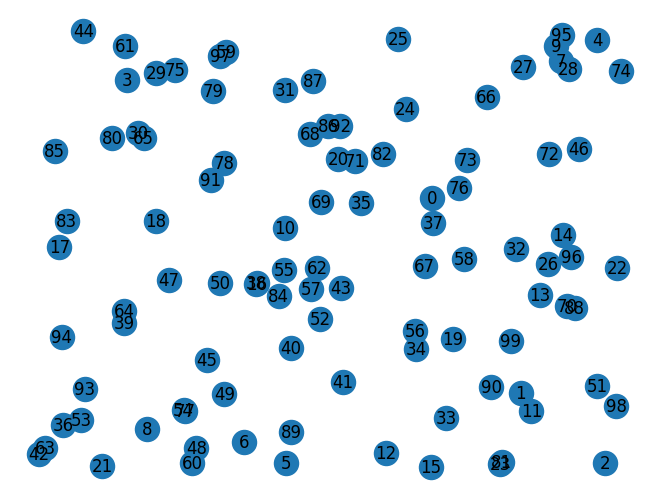

In [ ]:
#print(links.keys())
#print(nodes.keys())
#print(demands.keys())



NoOfUsers = 100

G_users = nx.Graph()



#to distrubute users across infra. determine first max & min (x,y) corrd. This maps a 2x2 grid, to distrbute users around
max_x = -float('inf')
min_x = float('inf')
max_y = -float('inf')
min_y = float('inf')

for node in nodes:
    node_id = nodes[node].get("id")
    x_cor = nodes[node].get("x_cor")
    if x_cor < min_x:
        min_x = x_cor
    if x_cor > max_x:
        max_x = x_cor
    y_cor = nodes[node].get("y_cor")
    if y_cor < min_y:
        min_y = y_cor
    if y_cor > max_y:
        max_y = y_cor
#DEBUG: CHECK (X,Y) VALUES OF GENERATED USERS
#print('max_x: ', max_x)
#print('min_x: ', min_x)
#print('max_y: ', max_y)
#print('min_y: ', min_y)


for u in range(NoOfUsers):
    randx = round(random.uniform(min_x, max_x), 2)
    #print(randx)
    randy = round(random.uniform(min_y, max_y), 2)
    #print(randy)
    G_users.add_node(u, pos=(randx, randy))
    
nx.draw(G_users, nx.get_node_attributes(G_users, 'pos'), with_labels=True, node_size=300, style = "solid")

#width=5, edge_color="skyblue", style="solid")

#print users + corrdinates
print(G_users.nodes.data())

G_users.graph



In [ ]:
#Combine users + infra graph 
# 
Un= nx.disjoint_union(G,G_users)
Un.nodes()

#nx.draw(Un, nx.get_node_attributes(Un, 'pos'), with_labels=True, node_size=300, style = "solid")

nx.draw(Un, with_labels=True)

#TO DO:
#-Connect users to the neasret AP
#-Plot users + connections + nodes in a beautiful way on same graph


# Add nodes to the graph, with the 'pos' attribute set to the latitude and longitude
for i, node_data in enumerate(nodes_data):
    G_users.add_node(i, pos=node_data['pos'])

# Draw the graph
pos = nx.get_node_attributes(G_users, 'pos')
nx.draw(G_users, pos, with_labels=False)
plt.show()

NameError: name 'G_users' is not defined

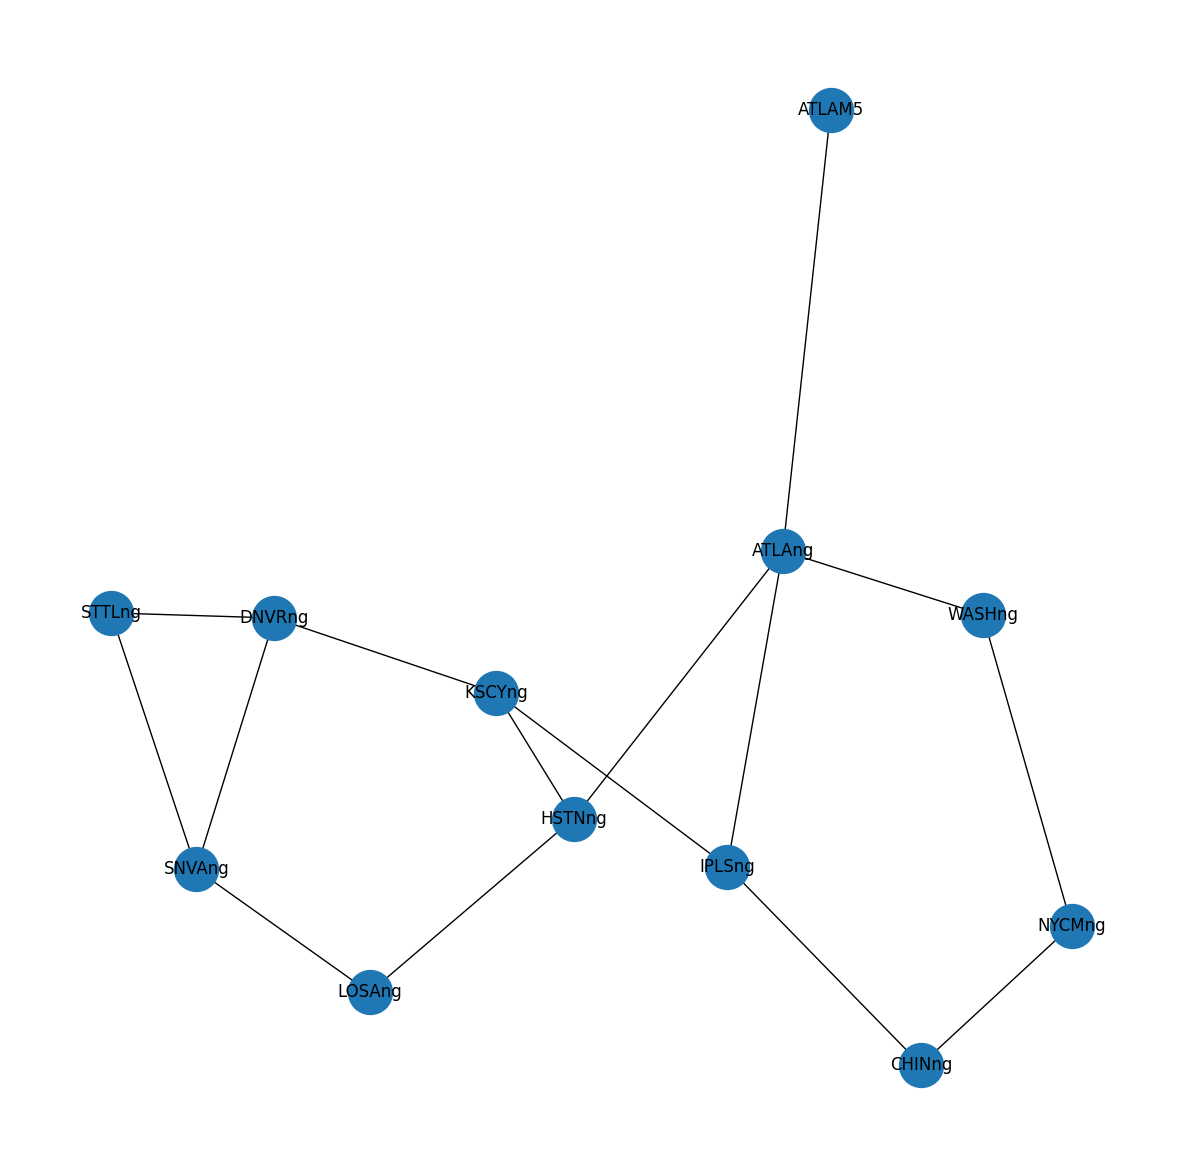

NetworkXError: Node 0 has no position.

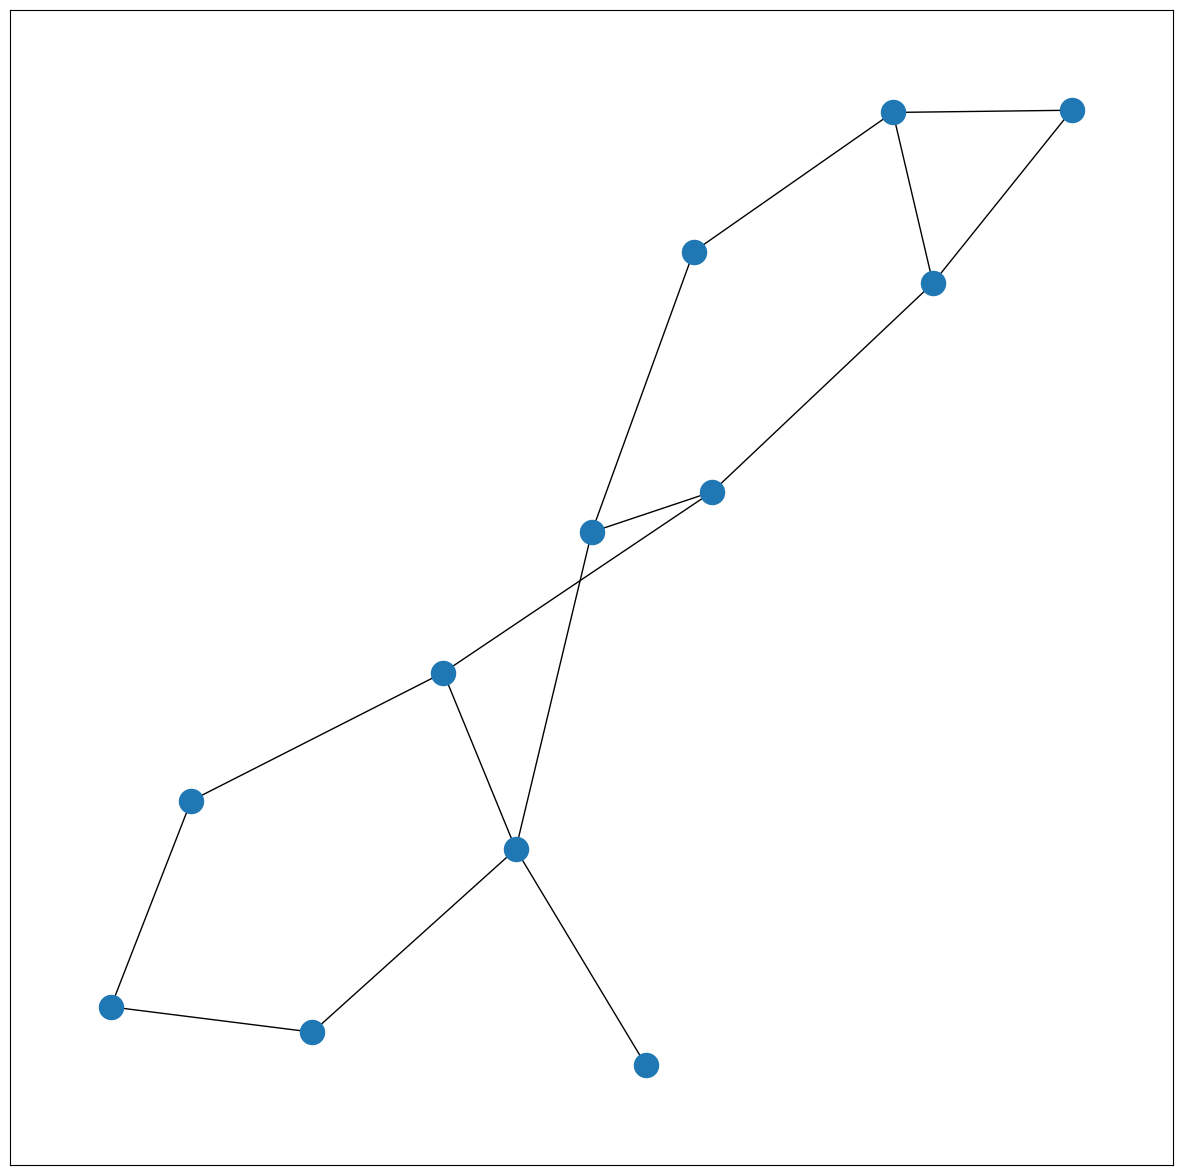

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from Import_NetworkFromXML import *
import random

def convert_nodes (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))

def convert_links (G, nodes, links):
    for link in links.keys():
        source = links[link].get("source")
        for source_node in nodes:
            if nodes[source_node].get('id') == source:
                break
        dest = links[link].get("destination")
        for dest_node in nodes:
            if nodes[dest_node].get('id') == dest:
                break
        capacity = links[link].get("capacity")
        cost = links[link].get("cost")
        G.add_edges_from([(source, dest, {'capacity': capacity, 'cost': cost})])

def convert_demands(G, nodes, demands):    
    a = 1

NoOfUsers = 100

G_users = nx.Graph()

network_name = "abilene.xml"
G = nx.Graph()
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

convert_nodes(G,nodes)
convert_links(G,nodes,links)

#to distrubute users across infra. determine first max & min (x,y) corrd. This maps a 2x2 grid, to distrbute users around
max_x = -float('inf')
min_x = float('inf')
max_y = -float('inf')
min_y = float('inf')

for node in nodes:
    node_id = nodes[node].get("id")
    x_cor = nodes[node].get("x_cor")
    if x_cor < min_x:
        min_x = x_cor
    if x_cor > max_x:
        max_x = x_cor
    y_cor = nodes[node].get("y_cor")
    if y_cor < min_y:
        min_y = y_cor
    if y_cor > max_y:
        max_y = y_cor

for i in range(NoOfUsers):
    randx = random.uniform(min_x, max_x)
    randy = random.uniform(min_y, max_y)
    G_users.add_node(i, pos=(randx, randy))

#final all shortest path pairs
sp = dict(nx.all_pairs_shortest_path(G))

#print(nx.info(G))

fig, ax = plt.subplots(figsize=(15,15))

nx.draw(G, with_labels=True, node_size=1000, ax=ax)

plt.show()

pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(15,15))

nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_nodes(G_users, pos, node_color='r', ax=ax)
nx.draw_networkx_edges(G_users, pos, edge_color='r', ax=ax)

plt.show()

